In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import permutation_test_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
tb = pd.read_csv("raw_data.csv")
tb = tb.drop(12, axis=0)
time =  np.array([1.000, 4.000, 7.000, 10.000, 13.000, 16.000, 21.000, 26.000, 31.000, 36.000, 41.000, 46.000])
tb['time'] = time
tb = tb.drop(tb.columns[0], axis=1)
tb

,Episodic Memory,Semantic Memory,Executive Functions,Attention & Processing Speed,Visuospatial Functions,time
0,1.699755,0.676376,0.420559,1.397400,0.374548,1.0
1,3.070047,0.723351,0.447419,1.325689,1.049295,4.0
2,1.917291,0.704802,0.499631,0.928316,1.092771,7.0
3,1.865487,0.868533,1.438919,1.300555,0.888015,10.0
4,1.334629,0.837765,1.033923,1.174871,0.229012,13.0
5,2.335754,1.276166,0.856049,1.754637,0.569265,16.0
6,1.526670,0.786626,0.794152,1.007998,0.611992,21.0
7,1.930263,1.265043,1.214109,1.263209,0.733970,26.0
8,1.019792,0.733305,0.727632,1.054922,0.366860,31.0
9,1.102496,1.002840,1.337733,1.455319,0.441424,36.0


In [3]:
tb.corr()

,Episodic Memory,Semantic Memory,Executive Functions,Attention & Processing Speed,Visuospatial Functions,time
Episodic Memory,1.000000,0.258515,-0.233508,0.466381,0.744570,-0.696955
Semantic Memory,0.258515,1.000000,0.592052,0.652154,0.061687,0.062615
Executive Functions,-0.233508,0.592052,1.000000,0.246602,-0.106676,0.297593
Attention & Processing Speed,0.466381,0.652154,0.246602,1.000000,0.053320,-0.337785
Visuospatial Functions,0.744570,0.061687,-0.106676,0.053320,1.000000,-0.562196
time,-0.696955,0.062615,0.297593,-0.337785,-0.562196,1.000000


In [4]:
episodic = tb[tb.columns[0]]
semantic = tb[tb.columns[1]]
executive = tb[tb.columns[2]]
attention = tb[tb.columns[3]]
visuospatial = tb[tb.columns[4]]

In [5]:
import seaborn as sns

In [6]:
time

array([ 1.,  4.,  7., 10., 13., 16., 21., 26., 31., 36., 41., 46.])

In [7]:
episodic

0     1.699755
1     3.070047
2     1.917291
3     1.865487
4     1.334629
5     2.335754
6     1.526670
7     1.930263
8     1.019792
9     1.102496
10    0.959155
11    1.174053
Name: Episodic Memory, dtype: float64

In [12]:
from matplotlib.pyplot import figure

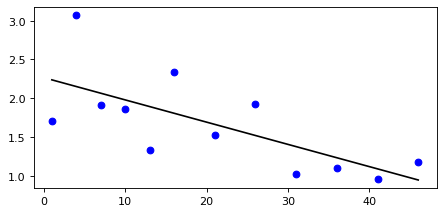

In [21]:
reg = ols_reg(time, episodic)
figure(figsize=(6.5, 3), dpi=80)
plt.scatter(time, episodic, color='blue')
plt.plot(time, reg.predict(), color='black')

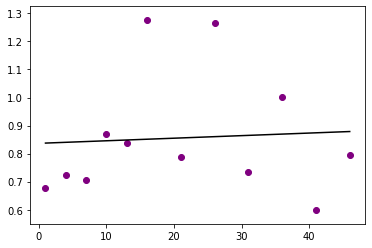

In [22]:
reg = ols_reg(time, semantic)
plt.scatter(time, semantic, color ='purple')
plt.plot(time, reg.predict(), color='black')

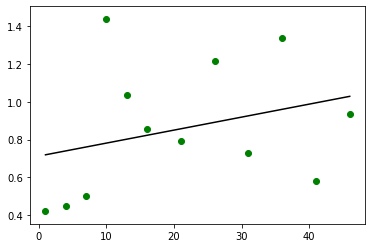

In [23]:
reg = ols_reg(time, executive)
plt.scatter(time, executive, color ='green')
plt.plot(time, reg.predict(), color = 'black')

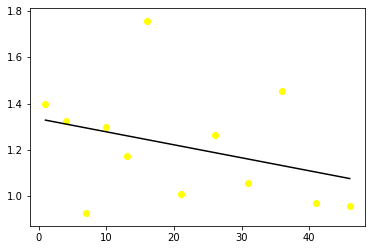

In [27]:
reg = ols_reg(time, attention)
plt.scatter(time, attention, color ='yellow')
plt.plot(time, reg.predict(), color = 'black')

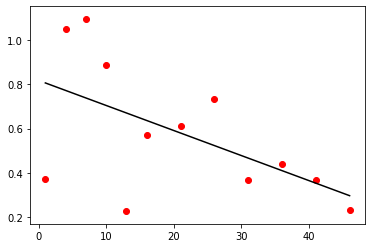

In [28]:
reg = ols_reg(time, visuospatial)
plt.scatter(time, visuospatial, color ='red')
plt.plot(time, reg.predict(), color = 'black')

In [9]:
def ols_reg(X, y):
    diabetes = datasets.load_diabetes()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
memory_scores = [episodic, semantic, executive, attention, visuospatial]
m_names = ['episodic', 'semantic', 'executive', 'attention', 'visuospatial']
f = open("results.txt", mode='w')
for idx in range(len(memory_scores)):
    memory = memory_scores[idx]
    name = m_names[idx]
    reg = ols_reg(time, memory)
    print("regression results between time and " + name + ": ", file=f)
    print(reg.summary(), file=f)

f.close()

In [31]:
def perm(X, y, n, m_name):
    k_r = 0
    reg = ols_reg(X, y)
    r2 = reg.rsquared
    
    X_shuf = np.copy(X)
    
    for i in range(n):
        np.random.shuffle(X_shuf)
        reg = ols_reg(X_shuf, y)
        r2_n = reg.rsquared
        k_r += r2 < r2_n
        
    return "p_value of permutation test shuffling coefficients of " + m_name + " memory scores " + str(n) + " times : "+ str(k_r / n) + "\n"

In [32]:
memory_scores = [episodic, semantic, executive, attention, visuospatial]
m_names = ['episodic', 'semantic', 'executive', 'attention', 'visuospatial']
f = open("results.txt", mode='a')
for idx in range(len(memory_scores)):
    memory = memory_scores[idx]
    name = m_names[idx]
    f.write(perm(time, memory, 1000, name))

f.close()

In [6]:
mci_cor = """-0.413
-0.472
-0.536
-0.444
-0.551
-0.269
-0.068
-0.367
-0.287
-0.088
-0.109
0.055
-0.125
"""

mci_beta = """-0.097
-0.093
-0.129
-0.077
-0.142
-0.04
0.007
-0.074
-0.063
-0.019
0.001
0.054
-0.004
"""

con_cor = """-0.024
-0.461
-0.088
-0.248
-0.176
-0.203
-0.188
-0.11
-0.143
0.06
0.051
-0.049
0.143
"""

con_beta = """0.051
-0.109
0.006
-0.038
-0.031
-0.026
-0.018
0
0.015
0.024
0.087
-0.043
-0.013
"""

every_cor = """-0.289
-0.486
-0.412
-0.386
-0.42
-0.267
-0.184
-0.301
-0.283
-0.078
-0.1
0.002
0.018
"""

every_beta = """-0.097
-0.093
-0.129
-0.077
-0.142
-0.04
0.007
-0.074
-0.063
-0.019
0.001
0.054
-0.004
"""

In [17]:
X = np.array([1.000, 4.000, 7.000, 10.000, 13.000, 16.000, 21.000, 26.000, 31.000, 36.000, 41.000, 46.000, 51.000])

In [18]:
def ols_reg(X, y):
    y = [float(val) for val in y.split()]
    diabetes = datasets.load_diabetes()
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    return est2

In [22]:
lst = [every_cor, every_beta, con_cor, con_beta, mci_cor, mci_beta]

In [25]:
with open("NE_cor_report.txt", "w") as f:
    for y in lst:
        print(ols_reg(X, y).summary(), file = f)

C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\15634\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  w